In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import Dense, Dropout, Input, BatchNormalization
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import SGD, Adam
import pickle
import cv2
import glob

from imutils import build_montages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd "drive/MyDrive/"

[Errno 2] No such file or directory: 'drive/MyDrive/'
/content/drive/MyDrive


# **Data** 

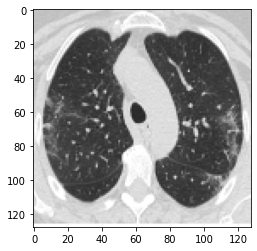

In [ ]:
path="archive (2)/COVID/*.png"
# initialize the list of images
list_images1 = []
for i in glob.glob(path):
  # image1 = cv2.imread(i,cv2.IMREAD_GRAYSCALE)
  image1 = cv2.imread(i)
  # image1=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image1=cv2.resize(image1,(128,128))
  list_images1.append(image1)
images1=np.array(list_images1)
images1 = images1.astype('float32') / 255.0  #  normalize [0,1]
# construct the montages for the images
plt.imshow(images1[0])

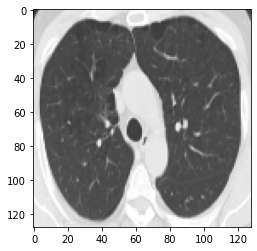

In [120]:
plt.imshow(images2[4])

In [ ]:
# compress file
f=open("archive (2)/COVID_images.p", "wb")
pickle.dump(images1,f)
f.close()

In [ ]:
# #read file
file1 = open("archive (2)/COVID_images.p",'rb')
images1 = pickle.load(file1)
file1.close()

In [ ]:
path="archive (2)/non-COVID/*.png"
# initialize the list of images
list_images2 = []
for i in glob.glob(path):
  # image2 = cv2.imread(i,cv2.IMREAD_GRAYSCALE)
  image2 = cv2.imread(i)
  image2=cv2.resize(image2,(128,128))
  list_images2.append(image2)
images2=np.array(list_images2)
images2 = images2.astype('float32') / 255.0  #  resize to[0,1]
# construct the montages for the images
# plt.imshow(images[0])

In [ ]:
# compress file
f=open("archive (2)/Non-COVID_images.p", "wb")
pickle.dump(images2,f)
f.close()

In [ ]:
# #read file
# file2 = open("archive (2)/Non-COVID_images.p",'rb')
# images2 = pickle.load(file2)
# file2.close()

In [ ]:
data = np.concatenate((images1, images2), axis=0)
labels =  np.concatenate((np.ones(images1.shape[0],dtype=int),np.zeros((images2.shape[0]), dtype=int)), axis=0)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.15, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.33, random_state=41)

In [ ]:
print("x_train = "+str(x_train.shape)) 
print("y_train = "+str(y_train.shape))
print("x_val = "+str(x_val.shape))
print("y_val = "+str(y_val.shape))
print("x_test = "+str(x_test.shape))
print("y_test = "+str(y_test.shape))

x_train = (1412, 128, 128, 3)
y_train = (1412,)
x_val = (696, 128, 128, 3)
y_val = (696,)
x_test = (373, 128, 128, 3)
y_test = (373,)


# **Network**

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator
# datagen = ImageDataGenerator(zoom_range=1.10,
#                          shear_range=0.10,
#                          horizontal_flip=True,fill_mode="nearest")

In [118]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout,BatchNormalization
import tensorflow as tf
from keras import optimizers
import datetime, os
model = Sequential()

model.add(Conv2D(input_shape=(128,128,3),filters=32,kernel_size=(2,2),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])
model.summary()


model.fit(x_train , y_train , batch_size=30, epochs=25, verbose=1, validation_data=(x_val, y_val), )
# model.fit(datagen.flow(x2_train , y2_train ),batch_size=35,epochs=80,verbose=1,validation_data=(x_val,y_val),callbacks=[tensorboard_callback])#need to be 80
# model.fit(datagen.flow(x_train , y_train ),batch_size=40,epochs=40,verbose=1,validation_data=(x_test,y_test),shuffle=True,callbacks=[tensorboard_callback])


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 128, 128, 32)      416       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 64)       

In [117]:
model.fit(x_train , y_train , batch_size=40, epochs=1, verbose=1, validation_data=(x_val, y_val))

45/45 [==============================] - 86s 2s/step - loss: 0.1287 - accuracy: 0.9547 - val_loss: 2.0336 - val_accuracy: 0.7500


In [119]:
x1=model.evaluate(x_test,y_test)
print("testing data = ",x1)
x2=model.evaluate(x_train,y_train)
print("training data = ",x2)
x3=model.evaluate(x_val,y_val)
print("val data = ",x3)

12/12 [==============================] - 3s 282ms/step - loss: 0.1967 - accuracy: 0.9410
testing data =  [0.196670800447464, 0.9410187602043152]
45/45 [==============================] - 13s 283ms/step - loss: 0.0027 - accuracy: 0.9993
training data =  [0.002660793950781226, 0.9992917776107788]
22/22 [==============================] - 6s 285ms/step - loss: 0.4754 - accuracy: 0.9411
val data =  [0.4753945469856262, 0.9410919547080994]
